In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import micasense.plotutils as plotutils
import micasense.metadata as metadata
import glob
import math
import micasense.capture as capture
import numpy as np
import time
import subprocess
import micasense.imageutils as imageutils
import micasense.utils as msutils
import tifffile
import micasense.dls as dls
import micasense.imageset as imageset
import exiftool
from pathlib import Path
from skimage import io

In [2]:
root_path = Path("/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment")

In [3]:
outpath = root_path / "calibrated"

In [4]:
outpath.mkdir(exist_ok=True)

In [5]:
panelNamesBefore = list(root_path.glob("IMG_0000_*.tif"))

In [6]:
panelNamesBefore = [x.as_posix() for x in panelNamesBefore]
panelNamesBefore

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_7.tif']

In [7]:
panelCapBefore = capture.Capture.from_filelist(panelNamesBefore)
panelCapBefore

In [8]:
cam_model = panelCapBefore.camera_model
cam_serial = panelCapBefore.camera_serial

In [9]:
panelNamesAfter= list(root_path.glob("IMG_0426_*.tif"))

In [10]:
panelNamesAfter = [x.as_posix() for x in panelNamesAfter]
panelNamesAfter

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_7.tif']

In [11]:
panelCapAfter = capture.Capture.from_filelist(panelNamesAfter)

In [12]:
imageNames = list(root_path.glob("IMG_*.tif"))
imageNames = imageNames[7:-7]
imageNames = [x.as_posix() for x in imageNames]

In [13]:
imageNames

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_7.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_5.tif',
 '/m

In [14]:
thecapture = capture.Capture.from_filelist(imageNames[-49:-42])

In [15]:
imageNames[-49:-42]

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_7.tif']

Manual values from the panel

In [17]:
altumPT_reflectance_by_band = [0.508, 0.509, 0.509, 0.509, 0.506, 0.5]

In [18]:
panel_radiance_before = panelCapBefore.panel_radiance()

In [19]:
ur, ul, ll, lr = panelCapBefore.images[0].panel_region

In [20]:
radiancePanelImage = panelCapBefore.images[0].radiance()

In [24]:
radiancePanelImage

array([[551.38712067, 537.26552724, 542.15377112, ..., 537.26552724,
        574.74206366, 571.48323441],
       [553.0165353 , 579.63030755, 548.12829142, ..., 547.58515321,
        551.93025888, 559.53419381],
       [570.9400962 , 566.05185232, 545.95573858, ..., 535.63611261,
        558.44791739, 546.49887679],
       ...,
       [454.70851945, 416.1457066 , 420.49081227, ...,  99.49613068,
        103.29809815, 100.03926889],
       [419.94767406, 418.86139765, 418.86139765, ..., 100.03926889,
        101.66868352,  98.40985427],
       [432.43985287, 400.93783675, 427.00847078, ...,  90.26278113,
         88.09022829,  94.6078868 ]])

In [22]:
panel_radiance_before

[995.5919394308485,
 1152.4086959532244,
 413.4168078736636,
 499.4984208130791,
 294.2924887972771,
 6627.808392508668]

In [25]:
ur, ul, ll, lr = panelCapBefore.images[0].panel_region
panelRegion = radiancePanelImage[lr[1]:ul[1], ul[0]:lr[0]]

In [26]:
panelRegion

array([[1013.59773663, 1001.64869603, 1028.26246828, ..., 1007.62321633,
        1017.3997041 , 1028.80560649],
       [ 986.98396439, 1021.20167156,  996.76045215, ..., 1029.89188291,
        1016.31342768, 1000.56241962],
       [ 989.15651722, 1016.85656589, 1012.51146022, ..., 1022.28794798,
        1014.68401305, 1011.96832201],
       ...,
       [ 995.67417573,  991.87220827,  986.44082618, ..., 1000.01928141,
         975.578062  , 1010.33890738],
       [ 979.38002946,  979.92316767,  970.1466799 , ...,  970.1466799 ,
         975.03492379,  989.15651722],
       [1013.05459843,  982.09572051,  992.41534648, ...,  998.38986678,
         965.80157423,  964.71529781]])

In [27]:
rad_to_ref = altumPT_reflectance_by_band[0] / panelRegion.mean()

In [28]:
rad_to_ref_img = rad_to_ref * radiancePanelImage

In [30]:
rad_to_ref_img

array([[0.28073928, 0.27354926, 0.27603811, ..., 0.27354926, 0.29263047,
        0.29097123],
       [0.2815689 , 0.29511932, 0.27908004, ..., 0.2788035 , 0.28101582,
        0.28488737],
       [0.2906947 , 0.28820584, 0.27797389, ..., 0.27271964, 0.28433429,
        0.27825043],
       ...,
       [0.23151528, 0.21188098, 0.2140933 , ..., 0.05065855, 0.05259433,
        0.05093509],
       [0.21381676, 0.21326368, 0.21326368, ..., 0.05093509, 0.05176471,
        0.05010547],
       [0.22017716, 0.20413788, 0.21741177, ..., 0.04595738, 0.04485122,
        0.0481697 ]])

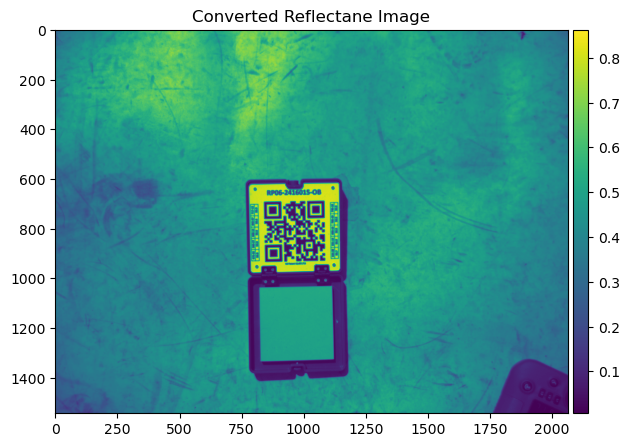

In [31]:
plotutils.plotwithcolorbar(rad_to_ref_img, 'Converted Reflectane Image');

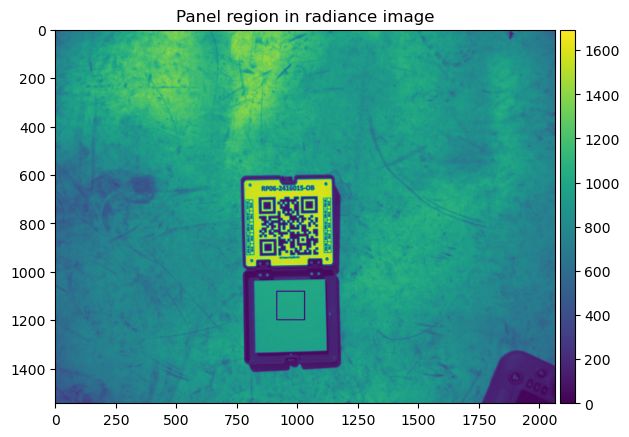

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Panel region in radiance image'}>)

In [32]:
markedImg = radiancePanelImage.copy()
cv2.rectangle(markedImg,(ul[0],ul[1]),(lr[0],lr[1]),(0,255,0),3)
plotutils.plotwithcolorbar(markedImg, 'Panel region in radiance image')

In [33]:
print('Mean Radiance in panel region: {:1.3f} W/m^2/nm/sr'.format(panelRegion.mean()))

print('Radiance to reflectance conversion factor: {:1.3f}'.format(rad_to_ref))

Mean Radiance in panel region: 997.739 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.001


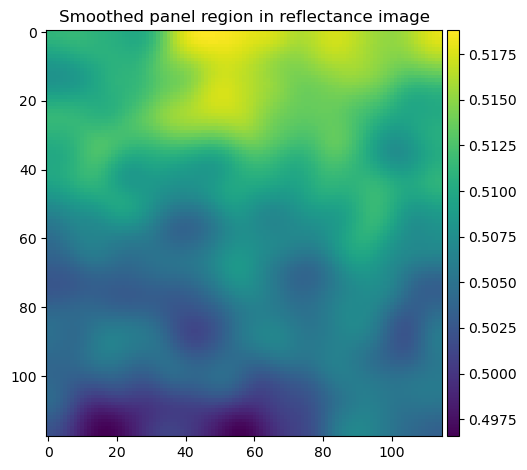

Min Reflectance in panel region: 0.47
Max Reflectance in panel region: 0.55
Mean Reflectance in panel region: 0.51
Standard deviation in region: 0.0098


In [34]:
panelRegionRaw = panelCapBefore.images[0].raw()[lr[1]:ul[1], ul[0]:lr[0]]
panelRegionRefl = rad_to_ref_img[lr[1]:ul[1], ul[0]:lr[0]]
panelRegionReflBlur = cv2.GaussianBlur(panelRegionRefl,(55,55),5)
plotutils.plotwithcolorbar(panelRegionReflBlur, 'Smoothed panel region in reflectance image')
print('Min Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.min()))
print('Max Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.max()))
print('Mean Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.mean()))
print('Standard deviation in region: {:1.4f}'.format(panelRegionRefl.std()))

In [39]:
flightImage = plt.imread("data/altum-pt-alignment/IMG_0011_1.tif")

In [40]:
from micasense.image import Image

In [41]:
img = Image("data/altum-pt-alignment/IMG_0011_1.tif")

In [42]:
img.radiance()

array([[ 5.86480153,  8.09554775,  6.10727395, ...,  6.64071326,
         9.98683258, 11.78112845],
       [ 6.93168016,  5.62232912,  6.44673533, ...,  5.81630705,
         6.78619671,  8.87145948],
       [ 6.10727395,  5.81630705,  5.9617905 , ...,  5.57383463,
         7.85307533,  6.98017464],
       ...,
       [14.59380846, 14.15735812, 11.87811742, ..., 13.23596294,
        14.2058526 , 14.98176433],
       [13.23596294, 13.52692984, 14.06036915, ..., 11.15070017,
        13.76940225, 11.10220569],
       [18.23089469, 14.44832502, 14.2058526 , ..., 11.05371121,
        12.07209535, 10.56876638]])

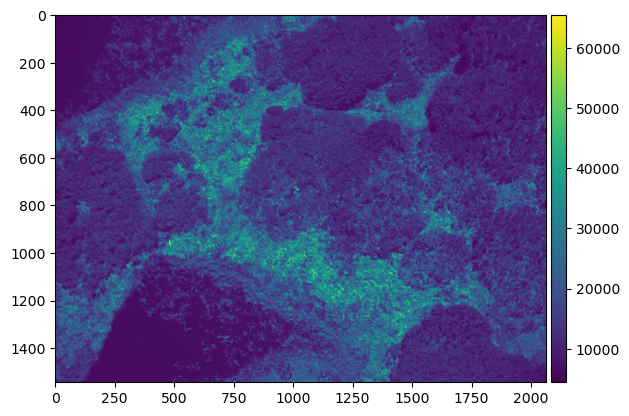

(<Figure size 640x480 with 2 Axes>, <Axes: >)

In [43]:
plotutils.plotwithcolorbar(flightImage)

In [44]:
flightRadianceImage, _, _, _ = msutils.raw_image_to_radiance(metadata.Metadata("data/altum-pt-alignment/IMG_0000_1.tif"), flightImage)

In [45]:
flightRadianceImage

array([[ 65.27842351,  90.26278113,  67.99411455, ...,  73.96863485,
        111.44517128, 131.54128502],
       [ 77.22746411,  62.56273246,  71.79608202, ...,  64.7352853 ,
         75.59804948,  98.95299247],
       [ 67.99411455,  64.7352853 ,  66.36469993, ...,  62.01959425,
         87.54709008,  77.77060232],
       ...,
       [163.04330115, 158.15505727, 132.62756144, ..., 147.8354313 ,
        158.69819548, 167.38840682],
       [147.8354313 , 151.09426055, 157.06878085, ..., 124.4804883 ,
        153.8099516 , 123.93735009],
       [203.77866683, 161.41388652, 158.69819548, ..., 123.39421188,
        134.80011428, 117.96282979]])

In [46]:
rad_to_ref

0.0005091509551962583

In [47]:
flightReflectanceImage =  flightRadianceImage * rad_to_ref

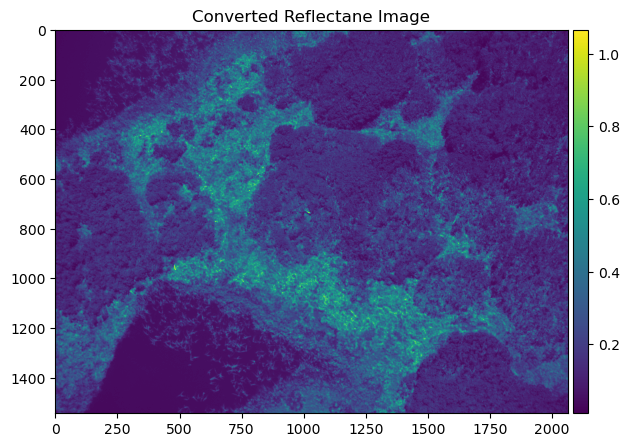

In [48]:
plotutils.plotwithcolorbar(flightReflectanceImage, 'Converted Reflectane Image');

In [ ]:
panel_reflectance_before = [x for x in panel_]

In [194]:
panel_irradiance_before = panelCapBefore.panel_irradiance(altumPT_reflectance_by_band)

In [195]:
irradiance_list = panel_irradiance_before + [0]

In [196]:
refl = thecapture.reflectance(irradiance_list)

In [197]:
panel_irradiance_before

[6156.977013561354,
 7112.767570018946,
 2551.6448064566684,
 3082.948073292873,
 1827.1682229489768,
 41643.74831061201]

In [198]:
refl

[array([[0.00299251, 0.00413075, 0.00311623, ..., 0.00338842, 0.00509577,
         0.00601131],
        [0.00353688, 0.00286879, 0.00328944, ..., 0.00296777, 0.00346265,
         0.00452666],
        [0.00311623, 0.00296777, 0.003042  , ..., 0.00284404, 0.00400703,
         0.00356163],
        ...,
        [0.00744648, 0.00722378, 0.0060608 , ..., 0.00675364, 0.00724853,
         0.00764443],
        [0.00675364, 0.00690211, 0.00717429, ..., 0.00568964, 0.00702583,
         0.00566489],
        [0.0093023 , 0.00737225, 0.00724853, ..., 0.00564015, 0.00615978,
         0.0053927 ]]),
 array([[0.00243227, 0.00279878, 0.00289873, ..., 0.00926262, 0.01096188,
         0.01226131],
        [0.00243227, 0.00253223, 0.00296537, ..., 0.00966245, 0.01096188,
         0.01189481],
        [0.00326524, 0.00273214, 0.00273214, ..., 0.00916267, 0.01092856,
         0.01386061],
        ...,
        [0.03418507, 0.03605092, 0.03811669, ..., 0.01895839, 0.01226131,
         0.01256118],
        [0.0

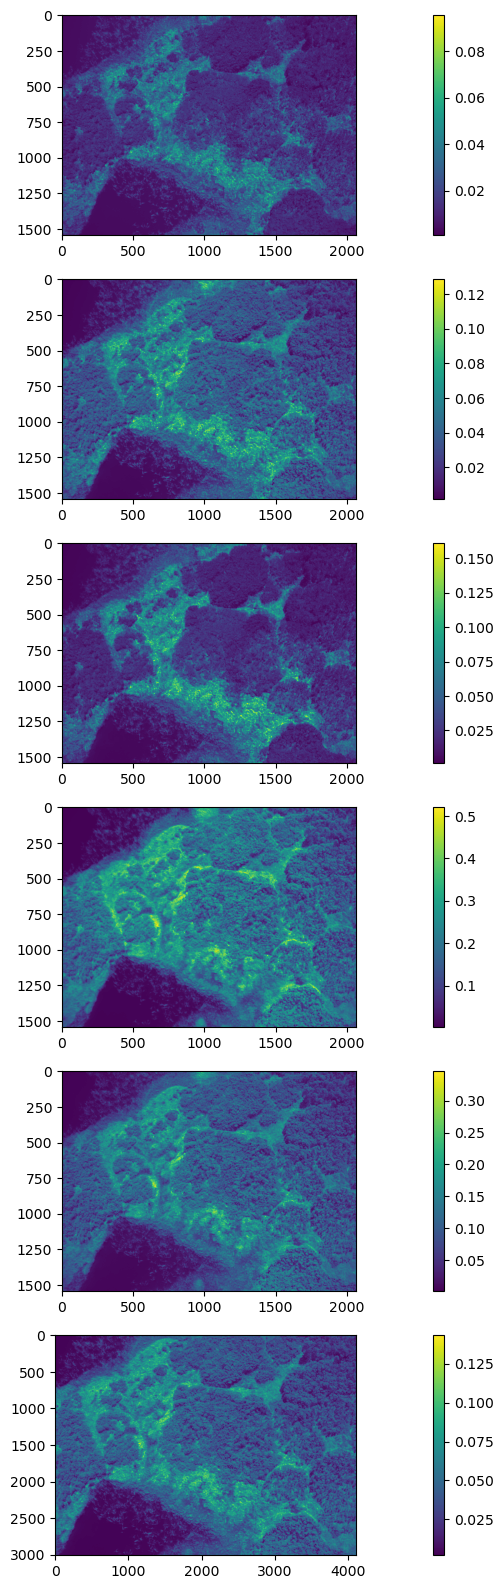

In [199]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

In [32]:
panel_irradiance_after = panelCapAfter.panel_irradiance(altumPT_reflectance_by_band)

In [33]:
irradiance_list_After = panel_irradiance_after + [0]
reflAfter = thecapture.reflectance(irradiance_list_After)

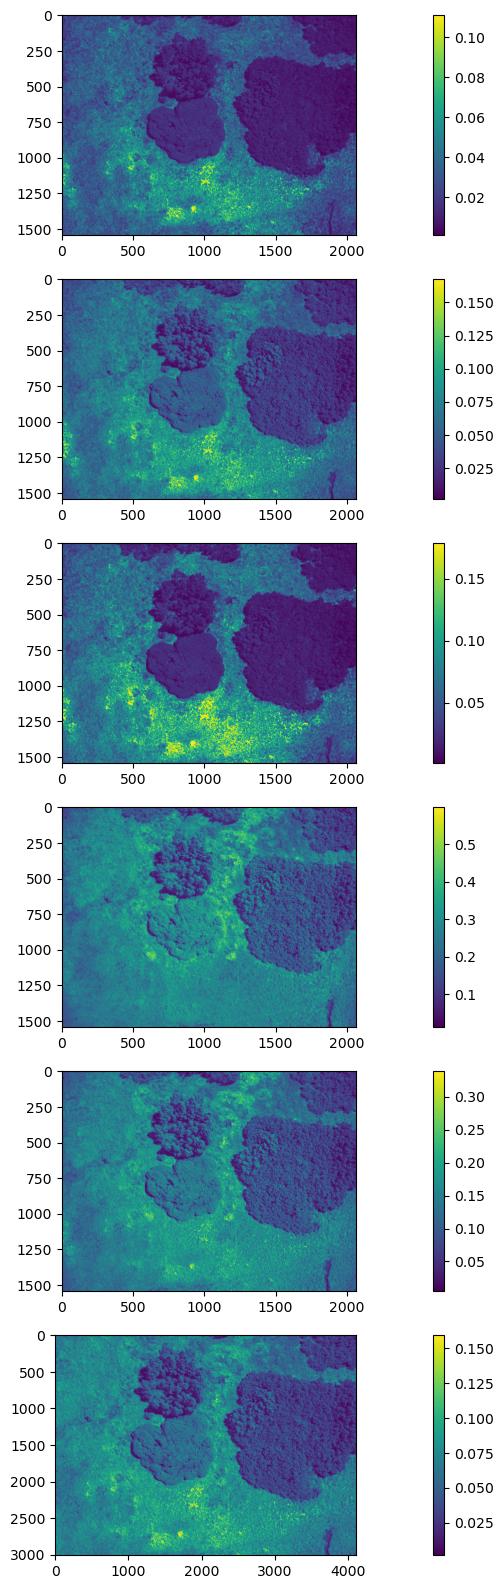

In [34]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(reflAfter[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

In [24]:
panelCapBefore.utc_time()

datetime.datetime(2025, 6, 22, 9, 15, 20, 993895, tzinfo=<UTC>)

In [25]:
panelCapAfter.utc_time()

datetime.datetime(2025, 6, 22, 9, 36, 26, 944360, tzinfo=<UTC>)

In [26]:
thecapture.utc_time()

datetime.datetime(2025, 6, 22, 9, 16, 3, 927326, tzinfo=<UTC>)

#### DLS addition

In [35]:
panelCapBefore.panel_radiance()

[995.5919394308485,
 1152.4086959532244,
 413.4168078736636,
 499.4984208130791,
 294.2924887972771,
 6627.808392508668]

In [36]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 ) = dls.compute_sun_angle(thecapture.location(), thecapture.dls_pose(), thecapture.utc_time(), np.array([0,0,-1]))

In [37]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 )

(array([-0.38784543,  0.39900705, -0.83088465]),
 array([-0.0442714 , -0.02154025, -0.99878729]),
 0.5763584099988815,
 0.9806956220863379,
 2.3420102877908477)

In [38]:
fresnel_corr = dls.fresnel(sun_sensor_angle)

In [91]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 ) = dls.compute_sun_angle(thecapture.location(), thecapture.dls_pose(), thecapture.utc_time(), np.array([0,0,-1]))
fresnel_corr = dls.fresnel(sun_sensor_angle)

dls_irradiances = []
#cwavelengths = []
dir_dif_ratio = 6.0
for img in thecapture.images:
    percent_diffuse = 1.0/dir_dif_ratio
    sensor_irradiance = img.spectral_irradiance / fresnel_corr
    untilted_dirrect_irr = sensor_irradiance / (percent_diffuse + np.cos(sun_sensor_angle))
    dls_irr = untilted_dirrect_irr*(percent_diffuse + np.sin(solar_elevation))
    dls_irradiances.append(dls_irr)
    #cwavelengths.append(img.center_wavelength)

In [92]:
cwavelengths

NameError: name 'cwavelengths' is not defined

In [93]:
dls_irradiances

[1.131088834113523,
 1.0448330379591033,
 0.9398430725660537,
 0.5493287750615351,
 0.711572327141991,
 0.8448318054908396,
 0.0]

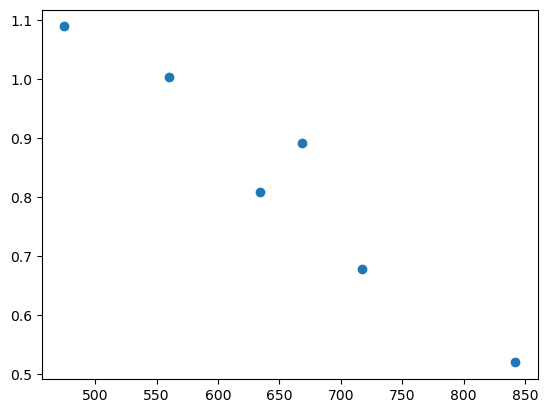

In [69]:
plt.scatter(cwavelengths[:-1], dls_irradiances[:-1])

In [94]:
panelBefore_radiances = np.array(panelCapBefore.panel_radiance())
panelAfter_radiances = np.array(panelCapAfter.panel_radiance())
irr_from_panel = math.pi * np.mean([panelBefore_radiances,panelAfter_radiances])/altumPT_reflectance_by_band
dls_correction = irr_from_panel/dls_irradiances[:-1]
dls_refl = thecapture.reflectance(dls_irradiances[:-1]*dls_correction)

In [95]:
panelAfter_radiances = np.array(panelCapAfter.panel_radiance())

In [96]:
irr_from_panel = math.pi * np.mean([panelBefore_radiances,panelAfter_radiances])/altumPT_reflectance_by_band

In [97]:
dls_correction = irr_from_panel/dls_irradiances[:-1]

In [98]:
dls_correction

array([ 9560.30630983, 10329.22066871, 11483.09896201, 19646.36025089,
       15256.77240472, 13004.44956952])

In [99]:
dls_irradiances

[1.131088834113523,
 1.0448330379591033,
 0.9398430725660537,
 0.5493287750615351,
 0.711572327141991,
 0.8448318054908396,
 0.0]

In [100]:
dls_refl = thecapture.reflectance(dls_irradiances[:-1]*dls_correction)

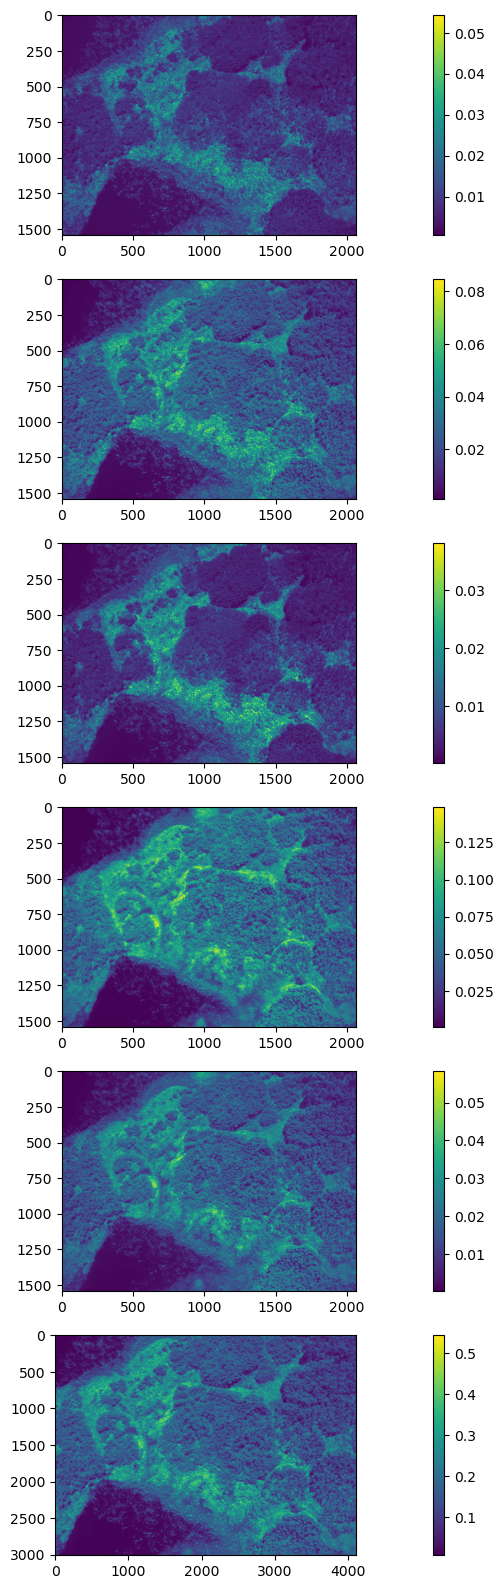

In [101]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(dls_refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

todo:
- interpolate between the panels (DONE)
- apply dls correction

# tu to je dobre tu pod

In [52]:
allImageNames = list(root_path.glob("IMG_*.tif"))
allImageNames = allImageNames[7:-7]
allImageNames = [x.as_posix() for x in allImageNames]

In [53]:
allImageNames

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_7.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_5.tif',
 '/m

In [69]:
out_paths = []

In [70]:
metadatas = []

In [78]:
thecapture.utc_time(), panelCapBefore.utc_time(), panelCapAfter.utc_time()

(datetime.datetime(2025, 6, 22, 9, 16, 53, 744062, tzinfo=<UTC>),
 datetime.datetime(2025, 6, 22, 9, 15, 20, 993895, tzinfo=<UTC>),
 datetime.datetime(2025, 6, 22, 9, 36, 26, 944360, tzinfo=<UTC>))

In [104]:
thecapture.utc_time().timestamp()

1750583813.744062

In [103]:
thecapture.dls_irradiance()

[1.0607377669745959,
 0.9869901376691093,
 0.8619443245013853,
 0.5135076185292293,
 0.6622140940109127,
 0.7927456552770594,
 0]

In [ ]:
numpy.interp(thecapture.radiance(), )

In [116]:
dls_refl

[array([[0.03041545, 0.03198807, 0.03262996, ..., 0.00798147, 0.00865546,
         0.00836661],
        [0.02540873, 0.03044754, 0.0318597 , ..., 0.00560649, 0.00490041,
         0.00390549],
        [0.02627527, 0.02547291, 0.02640365, ..., 0.00358454, 0.0026538 ,
         0.00316731],
        ...,
        [0.03673804, 0.03144247, 0.03176341, ..., 0.01972802, 0.01818749,
         0.01921451],
        [0.03590359, 0.02983775, 0.02887492, ..., 0.02110808, 0.02162159,
         0.01757769],
        [0.03202017, 0.02942052, 0.02993403, ..., 0.02280908, 0.022103  ,
         0.01780236]]),
 array([[0.04671706, 0.04455993, 0.0424028 , ..., 0.009714  , 0.01070959,
         0.01131802],
        [0.0463852 , 0.04328778, 0.03908414, ..., 0.0087184 , 0.01131802,
         0.01419419],
        [0.0458874 , 0.03842041, 0.03653984, ..., 0.00987993, 0.01286672,
         0.01613007],
        ...,
        [0.06662903, 0.06967113, 0.0709986 , ..., 0.04522367, 0.05816644,
         0.06624185],
        [0.0

## Lord why hast thou abandoned me

In [134]:
panelBefore_radiances = np.array(panelCapBefore.panel_radiance())
panelAfter_radiances = np.array(panelCapAfter.panel_radiance())
dir_dif_ratio = 6.0
percent_diffuse = 1.0/dir_dif_ratio

for i in range(0, len(allImageNames), 7):
    imgs = allImageNames[i:i+6]
    #print(imgs)
    imgsCap = capture.Capture.from_filelist(imgs)
    
    (sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
     ) = dls.compute_sun_angle(imgsCap.location(), imgsCap.dls_pose(), imgsCap.utc_time(), np.array([0,0,-1]))
    
    fresnel_corr = dls.fresnel(sun_sensor_angle)

    dls_irradiances = []
    #cwavelengths = []
    
    #for img in thecapture.images:
        
        
        #cwavelengths.append(img.center_wavelength)
    #cwavelengths.append(img.center_wavelength)
    
    #panel_irradiance_before = panelCapBefore.panel_irradiance(altumPT_reflectance_by_band)
    #irradiances_list = panel_irradiance_before[:-1]
    #reflectance_imgs = imgsCap.reflectance(irradiances_list)
    #print(imgs)
    #print(reflectance_imgs)
    
    #irr_from_panel = math.pi * np.mean([panelBefore_radiances,panelAfter_radiances])/altumPT_reflectance_by_band
    #dls_correction = irr_from_panel/dls_irradiances[:-1]
    #dls_refl = thecapture.reflectance(dls_irradiances[:-1]*dls_correction)
    
    for b, image in enumerate(imgs):
        #exif = imgsCap.images[b].meta.get_all()[0]
        #metadatas.append(exif)
        
        #DLS sranda
        sensor_irradiance = imgsCap.images[b].spectral_irradiance / fresnel_corr
        untilted_dirrect_irr = sensor_irradiance / (percent_diffuse + np.cos(sun_sensor_angle))
        dls_irr = untilted_dirrect_irr*(percent_diffuse + np.sin(solar_elevation))
        #dls_irradiances.append(dls_irr)

        #panelBefore_radiances = np.array(panelCapBefore.panel_radiance())
        #panelAfter_radiances = np.array(panelCapAfter.panel_radiance())
        #print(imgsCap.utc_time().timestamp(), [panelCapBefore.utc_time().timestamp(), panelCapAfter.utc_time().timestamp()], [
        #    panelBefore_radiances, panelAfter_radiances])
        
        
        

        #panel before
        radiancePanelImageBefore = panelCapBefore.images[b].radiance()
        ur, ul, ll, lr = panelCapBefore.images[b].panel_region
        panelRegionBefore = radiancePanelImageBefore[lr[1]:ul[1], ul[0]:lr[0]]
        radianceReflectanceFactorBefore = altumPT_reflectance_by_band[b] / panelRegionBefore.mean()
        
        #panel after
        radiancePanelImageAfter = panelCapAfter.images[b].radiance()
        ur, ul, ll, lr = panelCapAfter.images[b].panel_region
        panelRegionAfter = radiancePanelImageAfter[lr[1]:ul[1], ul[0]:lr[0]]
        radianceReflectanceFactorAfter = altumPT_reflectance_by_band[b] / panelRegionAfter.mean()
        
        #print("Before After factor difference:", radianceReflectanceFactorBefore - radianceReflectanceFactorAfter)
        #print(np.mean([radianceReflectanceFactorBefore, radianceReflectanceFactorAfter]))
        radianceReflectanceFactor = np.interp(imgsCap.utc_time().timestamp(), [panelCapBefore.utc_time().timestamp(), panelCapAfter.utc_time().timestamp()], [
            radianceReflectanceFactorBefore, radianceReflectanceFactorAfter
        ])
        
        interpolated_radiance = np.interp(imgsCap.utc_time().timestamp(), [panelCapBefore.utc_time().timestamp(), panelCapAfter.utc_time().timestamp()], [
            panelRegionBefore.mean(), panelRegionAfter.mean()
        ])
        #print("interpolated radiance", interpolated_radiance)
        irr_from_panel = math.pi * interpolated_radiance/altumPT_reflectance_by_band[b]
        #print("irr_from_panel", irr_from_panel)
        dls_correction = irr_from_panel/dls_irr
        
        print(irr_from_panel, "je irr from panel", dls_irr, "je dls_irr", dls_correction, "je dls_correction")
        #dls_refl = imgsCap.reflectance(dls_irr*dls_correction)
        
        print(radianceReflectanceFactorBefore, radianceReflectanceFactor, radianceReflectanceFactorAfter, "DLS sraqnda:", dls_correction)
        
        
        flightImage = plt.imread(image)
        flightRadianceImage, _, _, _ = msutils.raw_image_to_radiance(metadata.Metadata(panelNamesBefore[b]), flightImage)
        flightReflectanceImage = flightRadianceImage * math.pi / (dls_correction*dls_irr)
        in_path = Path(imgs[b])
        #with tifffile.TiffFile(in_path) as tif:
        #    tags = thecapture.images[b].meta.get_all()[0]
        
        #print(io.imread(in_path).dtype)
        out = outpath / in_path.name
        
        tifffile.imwrite(out, flightReflectanceImage.astype("float32"))
        #io.imsave(out, image.astype("float32"))
        out_paths.append(out)
       

6195.250151404114 je irr from panel 1.0894167288012968 je dls_irr 5686.758783501379 je dls_correction
0.0005091509551962583 0.000507308689879242 0.0004548292626311642 DLS sraqnda: 5686.758783501379
7155.370672884701 je irr from panel 1.0029641046516842 je dls_irr 7134.224086084979 je dls_correction
0.0004406017541293862 0.00043919462232431237 0.0003991105635784059 DLS sraqnda: 7134.224086084979
2567.3754094243122 je irr from panel 0.8915241818094788 je dls_irr 2879.75969896122 je dls_correction
0.0012275319788751858 0.0012239785924424258 0.001122755558463611 DLS sraqnda: 2879.75969896122
3102.6778348709063 je irr from panel 0.5192849554726121 je dls_irr 5974.904148815739 je dls_correction
0.0010152685377699362 0.0010127360475801364 0.0009405946282935192 DLS sraqnda: 5974.904148815739
1840.0129087871562 je irr from panel 0.6781934192683199 je dls_irr 2713.1093527452454 je dls_correction
0.0017134682462109998 0.001707935745246893 0.001550334948464811 DLS sraqnda: 2713.1093527452454
41816

6222.347837875836 je irr from panel 1.0899769417533185 je dls_irr 5708.696761847707 je dls_correction
0.0005091509551962583 0.0005053112335082354 0.0004548292626311642 DLS sraqnda: 5708.696761847707
7182.627188332941 je irr from panel 1.0020424800278316 je dls_irr 7167.9867186203965 je dls_correction
0.0004406017541293862 0.00043766895478721576 0.0003991105635784059 DLS sraqnda: 7167.9867186203965
2576.1575302900337 je irr from panel 0.8929145223467944 je dls_irr 2885.111022183032 je dls_correction
0.0012275319788751858 0.0012201258713912253 0.001122755558463611 DLS sraqnda: 2885.111022183032
3111.710987498061 je irr from panel 0.5182607726164359 je dls_irr 6004.141451394459 je dls_correction
0.0010152685377699362 0.0010099902223087145 0.0009405946282935192 DLS sraqnda: 6004.141451394459
1847.1069694723453 je irr from panel 0.6761474310571081 je dls_irr 2731.8109699603915 je dls_correction
0.0017134682462109998 0.0017019371905347771 0.001550334948464811 DLS sraqnda: 2731.8109699603915


6233.289931554304 je irr from panel 1.1398132124617715 je dls_irr 5468.694224110307 je dls_correction
0.0005091509551962583 0.0005045046570961489 0.0004548292626311642 DLS sraqnda: 5468.694224110307
7193.633417432775 je irr from panel 1.0496899130628154 je dls_irr 6853.103309760293 je dls_correction
0.0004406017541293862 0.0004370528875399056 0.0003991105635784059 DLS sraqnda: 6853.103309760293
2579.7037662134812 je irr from panel 0.9327163980454242 je dls_irr 2765.796518233667 je dls_correction
0.0012275319788751858 0.0012185701358230533 0.001122755558463611 DLS sraqnda: 2765.796518233667
3115.358590490345 je irr from panel 0.5442089431140914 je dls_irr 5724.563386745413 je dls_correction
0.0010152685377699362 0.0010088814532122844 0.0009405946282935192 DLS sraqnda: 5724.563386745413
1849.9715637121183 je irr from panel 0.7103121563921955 je dls_irr 2604.44868789584 je dls_correction
0.0017134682462109998 0.001699514963542673 0.001550334948464811 DLS sraqnda: 2604.44868789584
42032.84

[{'Capture ID': '-'},
 {'Filename': 'IMG_0001_1.tif'},
 {'Model': 'Altum-PT'},
 {'GPSDateStamp': '2025:06:22'},
 {'GPSTimeStamp': '09:16:03.927326'},
 {'GPSLatitude': '50.7342011'},
 {'GpsLatitudeRef': 'N'},
 {'GPSLongitude': '15.7053549'},
 {'GPSLongitudeRef': 'E'},
 {'GPSAltitude': '1467.156 m Above Sea Level'},
 {'GPSAltitudeRef': '0'},
 {'FocalLength': '7.919483625'},
 {'XResolution': '289.855072'},
 {'YResolution': '289.855072'},
 {'ResolutionUnits': 'mm'}]

In [137]:
subprocess.run(["exiftool", "-config", "altumconfigexif.cfg", "-tagsfromfile", f"{root_path}/%f.tif", outpath, "-xmp:all","-gps:all", "-overwrite_original"])

    1 directories scanned
  102 image files updated


CompletedProcess(args=['exiftool', '-config', 'altumconfigexif.cfg', '-tagsfromfile', '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/%f.tif', PosixPath('/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/calibrated'), '-xmp:all', '-gps:all', '-overwrite_original'], returncode=0)

In [89]:
a = io.imread("/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/calibrated/IMG_0017_1.tif")

In [90]:
a.dtype

dtype('float32')

In [227]:
imgsCap.images[0].meta.get_all()[0]

{'SourceFile': '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0017_1.tif',
 'ExifTool:ExifToolVersion': 13.33,
 'File:FileName': 'IMG_0017_1.tif',
 'File:Directory': '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment',
 'File:FileSize': 6381648,
 'File:FileModifyDate': '2025:06:22 09:17:14+02:00',
 'File:FileAccessDate': '2025:08:16 19:25:43+02:00',
 'File:FileInodeChangeDate': '2025:06:22 09:17:14+02:00',
 'File:FilePermissions': 100777,
 'File:FileType': 'TIFF',
 'File:FileTypeExtension': 'TIF',
 'File:MIMEType': 'image/tiff',
 'File:ExifByteOrder': 'II',
 'EXIF:SubfileType': 0,
 'EXIF:ImageWidth': 2064,
 'EXIF:ImageHeight': 1544,
 'EXIF:BitsPerSample': 16,
 'EXIF:Compression': 1,
 'EXIF:PhotometricInterpretation': 1,
 'EXIF:Make': 'MicaSense',
 'EXIF:Model': 'Altum-PT',
 'EXIF:StripOffsets': '(Binary data 119 bytes, use -b option to extract)',
 'EXIF:Orientation': 1,
 'EXIF:SamplesPerPixel': 1,
 'EXIF:RowsPerStrip': 100,
 'EXIF:StripByteCounts': '

In [109]:
refl[0]

array([[0.03053932, 0.03211835, 0.03276285, ..., 0.00801398, 0.00869071,
        0.00840068],
       [0.02551221, 0.03057155, 0.03198945, ..., 0.00562932, 0.00492037,
        0.00392139],
       [0.02638228, 0.02557666, 0.02651119, ..., 0.00359914, 0.00266461,
        0.00318021],
       ...,
       [0.03688767, 0.03157053, 0.03189278, ..., 0.01980836, 0.01826156,
        0.01929276],
       [0.03604981, 0.02995927, 0.02899252, ..., 0.02119404, 0.02170965,
        0.01764928],
       [0.03215058, 0.02954034, 0.03005595, ..., 0.02290197, 0.02219302,
        0.01787486]])

In [84]:
radiancePanelImageBefore, radiancePanelImageAfter

(array([[7906.05555652, 7813.72206097, 8047.27149089, ..., 6781.75946364,
         6640.54352927, 6787.19084573],
        [8052.70287298, 8215.64433572, 8030.97734462, ..., 6711.15149645,
         6798.05360991, 6928.4067801 ],
        [8210.21295363, 8172.19327899, 8226.5070999 , ..., 6781.75946364,
         6521.05312326, 6542.77865163],
        ...,
        [5092.59963327, 5005.69751981, 5092.59963327, ...,  139.17916609,
          188.06160491,  144.61054818],
        [4956.81508099, 5000.26613772, 4891.6384959 , ...,  144.61054818,
          133.747784  ,  182.63022282],
        [4924.22678845, 4897.06987799, 4935.08955263, ...,  144.61054818,
          133.747784  ,  188.06160491]]),
 array([[1986.52799986, 1926.78279686, 1850.74344758, ..., 7564.55740754,
         7684.04781354, 7559.12602544],
        [2046.27320286, 2127.74393423, 1888.76312222, ..., 7743.79301655,
         7526.5377329 , 7635.16537472],
        [2019.11629241, 2002.82214613, 1975.66523568, ..., 7531.96911499,